# COMP5318 - Machine Learning and Data Mining 

## Decision Tree

#### 10 fold cross validation

### 1 Load data

In [7]:
import numpy as np
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

### 2 Standardization

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_test)
X_test = scaler.transform(X_test)

scaler.fit(X_train)
X_train = scaler.transform(X_train)

G:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### 3 DT

#### 3.1 Define DT function

In [9]:
from sklearn.tree import DecisionTreeClassifier
def DT_parallel(X_train,y_train,X_val,y_val):
    
    # define DT parameters
    best_dt_clf = DecisionTreeClassifier(criterion='entropy',max_depth=10,splitter='best',random_state=666)

    best_dt_clf.fit(X_train, y_train) # train DT model

    return [y_val,best_dt_clf.predict(X_val)] # return [true label, predicted label]

#### 3.2 10-fold CV with parallel processing

In [10]:
%%time
from joblib import Parallel, delayed
import multiprocessing
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, random_state=666) # split data into 10 pairs of training set and validation set
 
num_cores = multiprocessing.cpu_count() # count available CPU
    
# parallel processing for 10-fold CV with all CPU working in parallel
result=Parallel(n_jobs=num_cores)(delayed(DT_parallel)(X_train[train],y_train[train],X_train[test],y_train[test] ) for train, test in kf.split(X_train))
# Wall time: 1min

Wall time: 1min


### 4 Evaluation

#### 4.1 classification_report

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

tmp=np.hstack(np.asarray(result)) # stack all results from parallel processing

print(classification_report(tmp[0], tmp[1]))
print(accuracy_score(tmp[0], tmp[1])) # 0.8112166666666667


#              precision    recall  f1-score   support

#           0       0.74      0.82      0.78      6000
#           1       0.97      0.93      0.95      6000
#           2       0.71      0.71      0.71      6000
#           3       0.81      0.84      0.82      6000
#           4       0.66      0.74      0.70      6000
#           5       0.92      0.86      0.89      6000
#           6       0.63      0.50      0.56      6000
#           7       0.83      0.90      0.87      6000
#           8       0.94      0.92      0.93      6000
#           9       0.91      0.89      0.90      6000

# avg / total       0.81      0.81      0.81     60000

             precision    recall  f1-score   support

          0       0.74      0.82      0.78      6000
          1       0.97      0.93      0.95      6000
          2       0.71      0.71      0.71      6000
          3       0.81      0.84      0.82      6000
          4       0.66      0.74      0.70      6000
          5       0.92      0.86      0.89      6000
          6       0.63      0.50      0.56      6000
          7       0.83      0.90      0.87      6000
          8       0.94      0.92      0.93      6000
          9       0.91      0.89      0.90      6000

avg / total       0.81      0.81      0.81     60000

0.8112166666666667


In [9]:
from sklearn.metrics import confusion_matrix

cm_dt=confusion_matrix(tmp[0], tmp[1])
cm_dt

# array([[4919,   29,  102,  251,   53,    9,  582,    4,   48,    3],
#        [  31, 5603,   47,  265,   16,    4,   26,    0,    7,    1],
#        [  87,    8, 4242,   89, 1126,    4,  401,    1,   40,    2],
#        [ 303,  101,   69, 5012,  330,   12,  136,    0,   31,    6],
#        [  35,   10,  661,  269, 4438,    2,  550,    2,   32,    1],
#        [  11,    8,    7,   14,    2, 5179,    7,  501,   79,  192],
#        [1155,   21,  783,  209,  716,   15, 3014,    0,   84,    3],
#        [   0,    0,    0,    0,    0,  231,    1, 5428,   15,  325],
#        [  63,   14,   85,   55,   62,   65,   90,   41, 5517,    8],
#        [   4,    1,    4,    6,    1,  103,    8,  538,   14, 5321]],
#       dtype=int64)

array([[4919,   29,  102,  251,   53,    9,  582,    4,   48,    3],
       [  31, 5603,   47,  265,   16,    4,   26,    0,    7,    1],
       [  87,    8, 4242,   89, 1126,    4,  401,    1,   40,    2],
       [ 303,  101,   69, 5012,  330,   12,  136,    0,   31,    6],
       [  35,   10,  661,  269, 4438,    2,  550,    2,   32,    1],
       [  11,    8,    7,   14,    2, 5179,    7,  501,   79,  192],
       [1155,   21,  783,  209,  716,   15, 3014,    0,   84,    3],
       [   0,    0,    0,    0,    0,  231,    1, 5428,   15,  325],
       [  63,   14,   85,   55,   62,   65,   90,   41, 5517,    8],
       [   4,    1,    4,    6,    1,  103,    8,  538,   14, 5321]],
      dtype=int64)

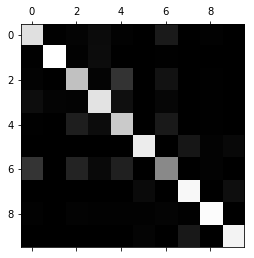

In [13]:
# visualization
import matplotlib.pyplot as plt
plt.matshow(cm_dt, cmap=plt.cm.gray)
plt.show()
#present in gray value, bigger values are brighter


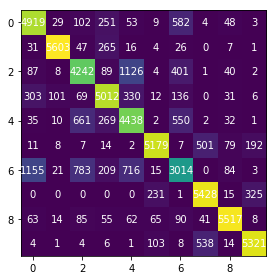

In [11]:
#another way to visulize
fig, ax = plt.subplots()
im = ax.imshow(cm_dt)
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, cm_dt[i][j], ha='center', va='center', color='w')
fig.tight_layout()
plt.show()

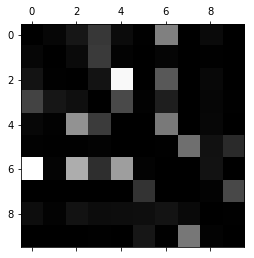

In [12]:
error_matrix = cm_dt / np.sum(cm_dt, axis=1)
np.fill_diagonal(error_matrix, 0)
#error_matrix: the bigger value means more wrong predictions
# visualization
import matplotlib.pyplot as plt
plt.matshow(error_matrix, cmap=plt.cm.gray)
plt.show()
#present in gray value, bigger values are brighter